# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sitka
Processing Record 2 of Set 1 | ginir
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | badger
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | ephraim
Processing Record 10 of Set 1 | tiffin
Processing Record 11 of Set 1 | sisimiut
Processing Record 12 of Set 1 | zango
Processing Record 13 of Set 1 | sabha
Processing Record 14 of Set 1 | arkhangel'sk
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | santana
Processing Record 17 of Set 1 | grand-bassam
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | mangrol
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | rio turbio
City not found. Skipping...
Processing Record 22 of Set 1 |

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sitka,57.0531,-135.3300,42.89,90,100,4.16,US,1698721267
1,ginir,7.1333,40.7000,55.65,85,17,3.02,ET,1698721375
2,grytviken,-54.2811,-36.5092,36.93,82,88,6.67,GS,1698721376
3,edinburgh of the seven seas,-37.0676,-12.3116,56.89,95,100,27.65,SH,1698721376
4,port alfred,-33.5906,26.8910,57.74,80,21,15.21,ZA,1698721376


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sitka,57.0531,-135.3300,42.89,90,100,4.16,US,1698721267
1,ginir,7.1333,40.7000,55.65,85,17,3.02,ET,1698721375
2,grytviken,-54.2811,-36.5092,36.93,82,88,6.67,GS,1698721376
3,edinburgh of the seven seas,-37.0676,-12.3116,56.89,95,100,27.65,SH,1698721376
4,port alfred,-33.5906,26.8910,57.74,80,21,15.21,ZA,1698721376


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

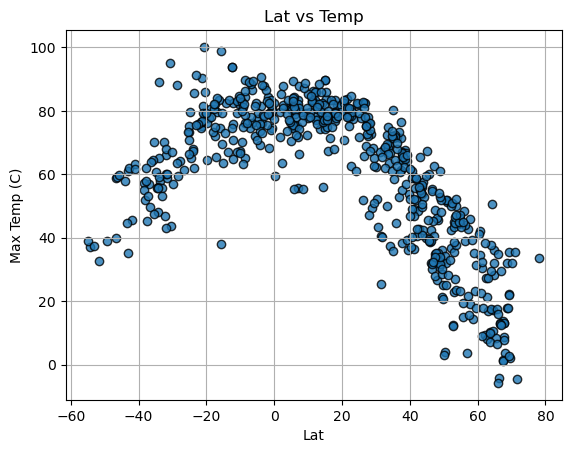

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],
           city_data_df["Max Temp"],
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="cities")

# Incorporate the other graph properties
plt.title("Lat vs Temp")
plt.ylabel('Max Temp (C)')
plt.xlabel("Lat")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

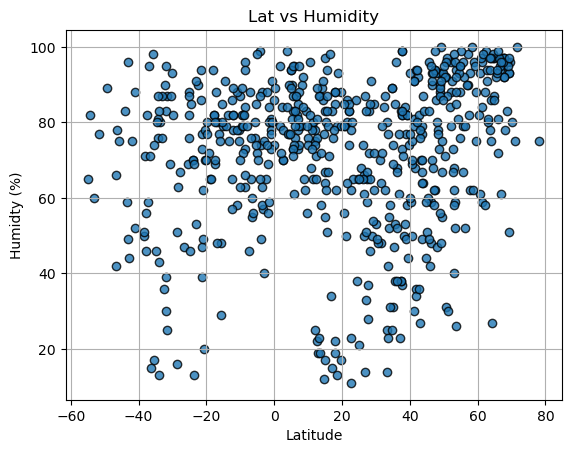

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], 
            edgecolor="black", linewidth=1, marker="o", alpha=0.8, label=("cities"))

# Incorporate the other graph properties
plt.title("Lat vs Humidity")
plt.ylabel("Humidty (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

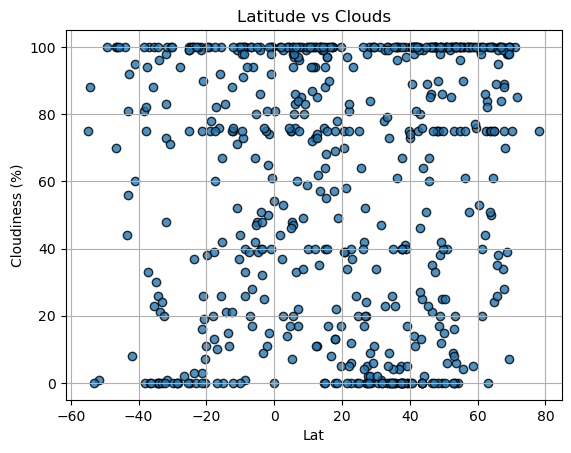

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], 
            edgecolor="black", linewidth=1, marker="o", alpha=0.8, label=("cities"))
# Incorporate the other graph properties
plt.title("Latitude vs Clouds")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Lat")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

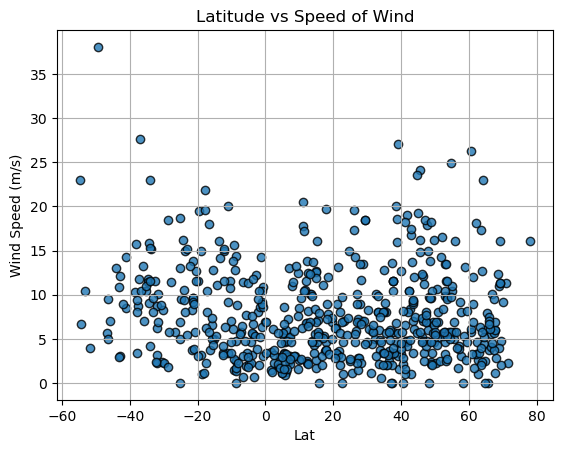

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], 
            edgecolor="black", linewidth=1, marker="o", alpha=0.8, label=("cities"))
# Incorporate the other graph properties
plt.title("Latitude vs Speed of Wind")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Lat")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0
northern_hemi_df=city_data_df[(city_data_df["Lat"]>=0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sitka,57.0531,-135.3300,42.89,90,100,4.16,US,1698721267
1,ginir,7.1333,40.7000,55.65,85,17,3.02,ET,1698721375
5,yellowknife,62.4560,-114.3525,27.41,99,75,4.61,CA,1698721288
6,badger,64.8000,-147.5333,28.38,97,24,2.44,US,1698721376
8,ephraim,39.3597,-111.5863,36.27,44,0,1.61,US,1698721377


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"]<0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,grytviken,-54.2811,-36.5092,36.93,82,88,6.67,GS,1698721376
3,edinburgh of the seven seas,-37.0676,-12.3116,56.89,95,100,27.65,SH,1698721376
4,port alfred,-33.5906,26.8910,57.74,80,21,15.21,ZA,1698721376
7,adamstown,-25.0660,-130.1015,73.40,76,100,6.85,PN,1698721376
15,santana,-0.0583,-51.1817,82.58,74,0,6.91,BR,1698721378


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8710053578849954


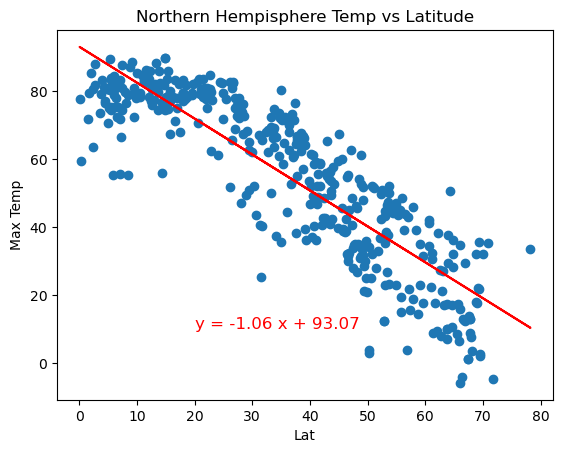

In [15]:
# Linear regression on Northern Hemisphere
x_north = northern_hemi_df["Lat"]
y_north = northern_hemi_df["Max Temp"]
plot_linear_regression(x_north, y_north, 'Max Temp')
(slope, intercept, rvalue, pvalue, stderr) = linregress (x_north,y_north)
regress_values = x_north * slope + intercept
line_equation = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

plt.scatter(x_north, y_north)
plt.plot(x_north, regress_values, "r")
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.title("Northern Hempisphere Temp vs Latitude")
print(f"The r-squared is: {rvalue}")
plt.annotate(line_equation, (20, 10), fontsize=12, color="red")
plt.show()

The r-squared is: 0.7185545342957324


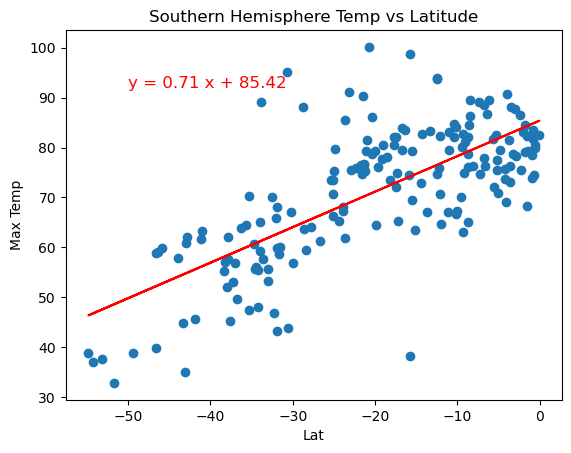

In [17]:
# Linear regression on Southern Hemisphere
x_south = southern_hemi_df["Lat"]
y_south = southern_hemi_df["Max Temp"]
plot_linear_regression(x_south, y_south, 'Max Temp')
(slope, intercept, rvalue, pvalue, stderr) = linregress (x_south,y_south)
regress_values = x_south * slope + intercept
line_equation = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

plt.scatter(x_south, y_south)
plt.plot(x_south, regress_values, "r")
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere Temp vs Latitude")
print(f"The r-squared is: {rvalue}")
plt.annotate(line_equation, (-50,92), fontsize=12, color="red")
plt.show()

**Discussion about the linear relationship:** Northern Hempisphere has a negative correlation between latitude and max temperature, while in the Southern Hemisphere, there is a postive but not too positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.1908199180599873


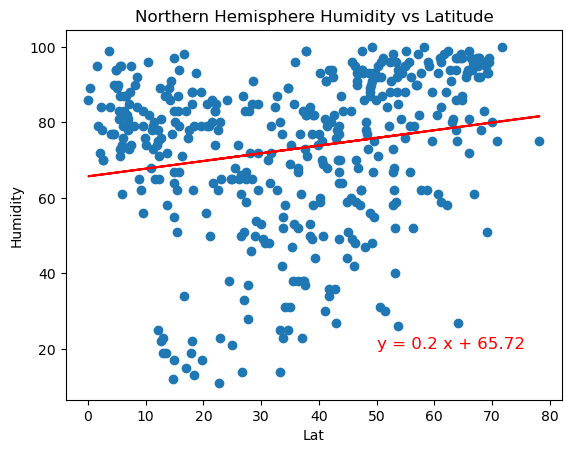

In [18]:
# Northern Hemisphere
x_north_humid = northern_hemi_df["Lat"]
y_north_humid = northern_hemi_df["Humidity"]
plot_linear_regression(x_north_humid, y_north_humid, 'Humidity')
(slope, intercept, rvalue, pvalue, stderr) = linregress (x_north_humid,y_north_humid)
regress_values = x_north_humid * slope + intercept
line_equation = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

plt.scatter(x_north_humid, y_north_humid)
plt.plot(x_north_humid, regress_values, "r")
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere Humidity vs Latitude")
print(f"The r-squared is: {rvalue}")
plt.annotate(line_equation, (50,20), fontsize=12, color="red")
plt.show()

The r-squared is: 0.17873104942196313


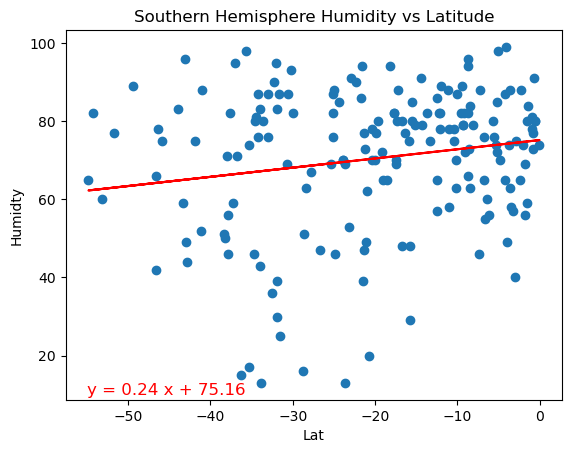

In [21]:
# Southern Hemisphere
x_south_humid = southern_hemi_df["Lat"]
y_south_humid = southern_hemi_df["Humidity"]
plot_linear_regression(x_south_humid, y_south_humid, 'Humidity')
(slope, intercept, rvalue, pvalue, stderr) = linregress (x_south_humid,y_south_humid)
regress_values = x_south_humid * slope + intercept
line_equation = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

plt.scatter(x_south_humid, y_south_humid)
plt.plot(x_south_humid, regress_values, "r")
plt.xlabel("Lat")
plt.ylabel("Humidty")
plt.title("Southern Hemisphere Humidity vs Latitude")
print(f"The r-squared is: {rvalue}")
plt.annotate(line_equation, (-55,10), fontsize=12, color="red")
plt.show()

**Discussion about the linear relationship:** Northern Hemisphere has a positive but not too positive correlation between Latitude and Humidity. The same can be said about the Southern Hemisphere relation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0684377586055206


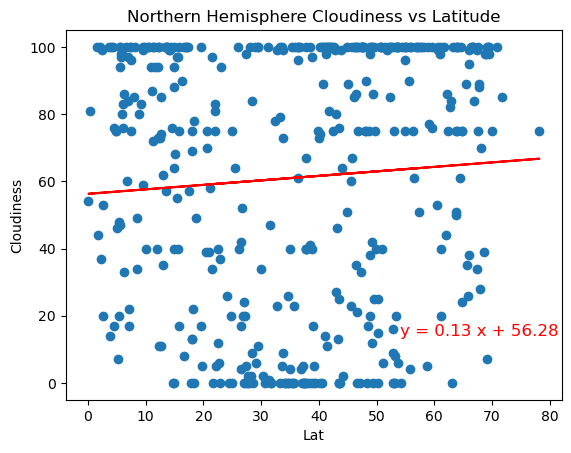

In [27]:
# Northern Hemisphere
x_north_cloud = northern_hemi_df["Lat"]
y_north_cloud = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_north_cloud, y_north_cloud, 'Cloudiness')
(slope, intercept, rvalue, pvalue, stderr) = linregress (x_north_cloud,y_north_cloud)
regress_values = x_north_cloud * slope + intercept
line_equation = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

plt.scatter(x_north_cloud, y_north_cloud)
plt.plot(x_north_cloud, regress_values, "r")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere Cloudiness vs Latitude")
print(f"The r-squared is: {rvalue}")
plt.annotate(line_equation, (54,14), fontsize=12, color="red")
plt.show()

The r-squared is: 0.05495326452233752


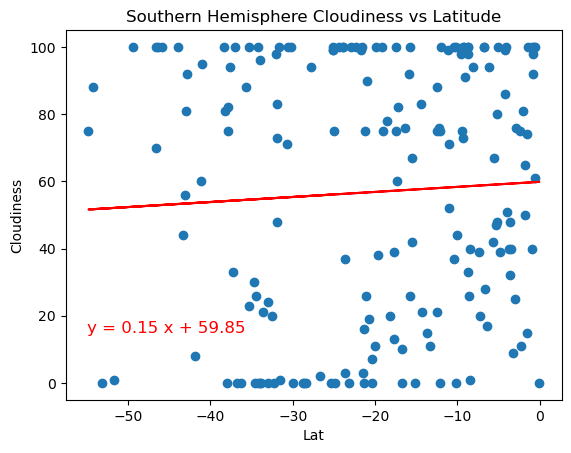

In [28]:
# Southern Hemisphere
x_south_cloud = southern_hemi_df["Lat"]
y_south_cloud = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_south_cloud, y_south_cloud, 'Cloudiness')
(slope, intercept, rvalue, pvalue, stderr) = linregress (x_south_cloud,y_south_cloud)
regress_values = x_south_cloud * slope + intercept
line_equation = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

plt.scatter(x_south_cloud, y_south_cloud)
plt.plot(x_south_cloud, regress_values, "r")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere Cloudiness vs Latitude")
print(f"The r-squared is: {rvalue}")
plt.annotate(line_equation, (-55,15), fontsize=12, color="red")
plt.show()

**Discussion about the linear relationship:** There is a positive but not too positive correlation between the Latitude and how cloudy it is for both the Northern and Southern Hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.12458599438913018


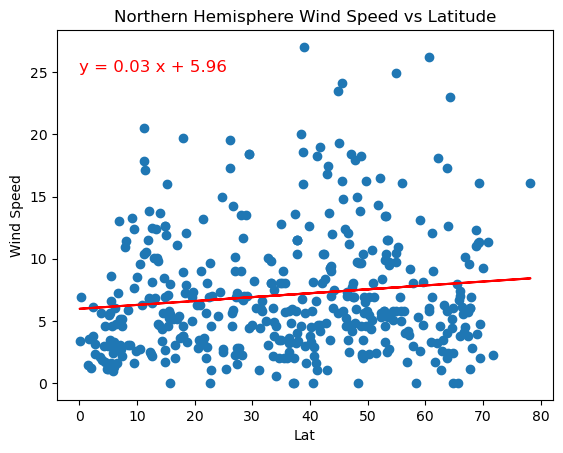

In [29]:
# Northern Hemisphere
x_north_speed = northern_hemi_df["Lat"]
y_north_speed = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_north_speed, y_north_speed, 'Wind Speed')
(slope, intercept, rvalue, pvalue, stderr) = linregress (x_north_speed,y_north_speed)
regress_values = x_north_speed * slope + intercept
line_equation = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

plt.scatter(x_north_speed, y_north_speed)
plt.plot(x_north_speed, regress_values, "r")
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere Wind Speed vs Latitude")
print(f"The r-squared is: {rvalue}")
plt.annotate(line_equation, (0,25), fontsize=12, color="red")
plt.show()

The r-squared is: -0.2710190044786785


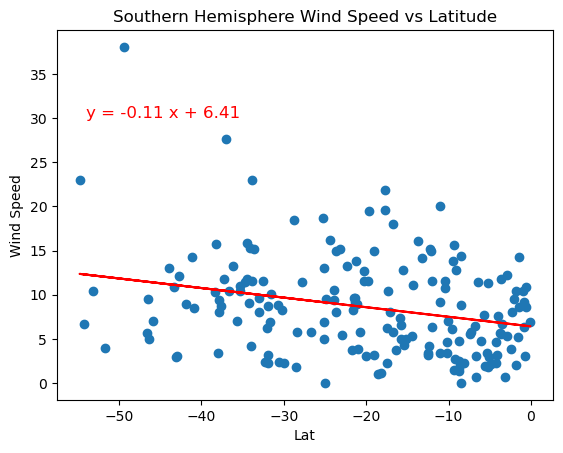

In [31]:
# Southern Hemisphere
x_south_speed = southern_hemi_df["Lat"]
y_south_speed = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_south_speed, y_south_speed, 'Wind Speed')
(slope, intercept, rvalue, pvalue, stderr) = linregress (x_south_speed,y_south_speed)
regress_values = x_south_speed * slope + intercept
line_equation = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

plt.scatter(x_south_speed, y_south_speed)
plt.plot(x_south_speed, regress_values, "r")
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere Wind Speed vs Latitude")
print(f"The r-squared is: {rvalue}")
plt.annotate(line_equation, (-54,30), fontsize=12, color="red")
plt.show()

**Discussion about the linear relationship:** Northern Hemisphere has a slightly positive correlation between Latitude and Wind Speed while Southern Hemisphere has a slightly negative correlation.